<a href="https://colab.research.google.com/github/Pranu008/Big-Data-analytics-and-Machine-learning/blob/Neha-HC/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import basic numerical and data handling libraries
import numpy as np
import pandas as pd

# Import plotting utility
from matplotlib.pyplot import subplots

# Import dataset utilities and helper functions from ISLP
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

# Import model selection tools
import sklearn.model_selection as skm


In [4]:
# Import tree-based models and plotting utilities
from sklearn.tree import (
    DecisionTreeClassifier as DTC,
    DecisionTreeRegressor as DTR,
    plot_tree,
    export_text
)

# Import performance metrics
from sklearn.metrics import accuracy_score, log_loss

# Import ensemble models
from sklearn.ensemble import (
    RandomForestRegressor as RF,
    GradientBoostingRegressor as GBR
)

# Import Bayesian Additive Regression Trees
from ISLP.bart import BART


In [2]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 10.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=6b49249fec6723fd5413f85c3c4ec6e6619004ecb50e115d3e41b83131b9c30e
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [5]:
# Load the Carseats dataset from ISLP
Carseats = load_data('Carseats')

# Display first few rows to understand the data
Carseats.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
# Create a binary variable 'High' based on Sales
High = np.where(Carseats['Sales'] > 8, 'Yes', 'No')

# Display class counts
pd.Series(High).value_counts()


,count
No,236
Yes,164


In [7]:
# Define model specification excluding Sales
model = MS(Carseats.columns.drop('Sales'), intercept=False)

# Build design matrix
D = model.fit_transform(Carseats)

# Extract feature names
feature_names = list(D.columns)

# Convert predictors to NumPy array
X = np.asarray(D)


In [8]:
# Fit a classification tree using entropy criterion
clf = DTC(criterion='entropy', random_state=0)
clf.fit(X, High)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [9]:
# Compute training accuracy
accuracy_score(High, clf.predict(X))

# Compute residual deviance using log loss
resid_dev = np.sum(log_loss(High, clf.predict_proba(X)))
resid_dev


np.float64(2.2204460492503136e-16)

[Text(0.6036931818181818, 0.9583333333333334, 'ShelveLoc[Good] <= 0.5\nentropy = 0.977\nsamples = 400\nvalue = [236, 164]'),
 Text(0.3058712121212121, 0.875, 'Price <= 92.5\nentropy = 0.894\nsamples = 315\nvalue = [217, 98]'),
 Text(0.4547821969696969, 0.9166666666666667, 'True  '),
 Text(0.07196969696969698, 0.7916666666666666, 'Income <= 57.0\nentropy = 0.887\nsamples = 46\nvalue = [14, 32]'),
 Text(0.030303030303030304, 0.7083333333333334, 'ShelveLoc[Medium] <= 0.5\nentropy = 0.881\nsamples = 10\nvalue = [7, 3]'),
 Text(0.015151515151515152, 0.625, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.045454545454545456, 0.625, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.11363636363636363, 0.7083333333333334, 'Population <= 207.5\nentropy = 0.711\nsamples = 36\nvalue = [7, 29]'),
 Text(0.07575757575757576, 0.625, 'Age <= 56.5\nentropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.045454545454545456, 0.5416666666666666, 'Price <= 88.0\nentropy = 0.544\nsamples = 8\nva

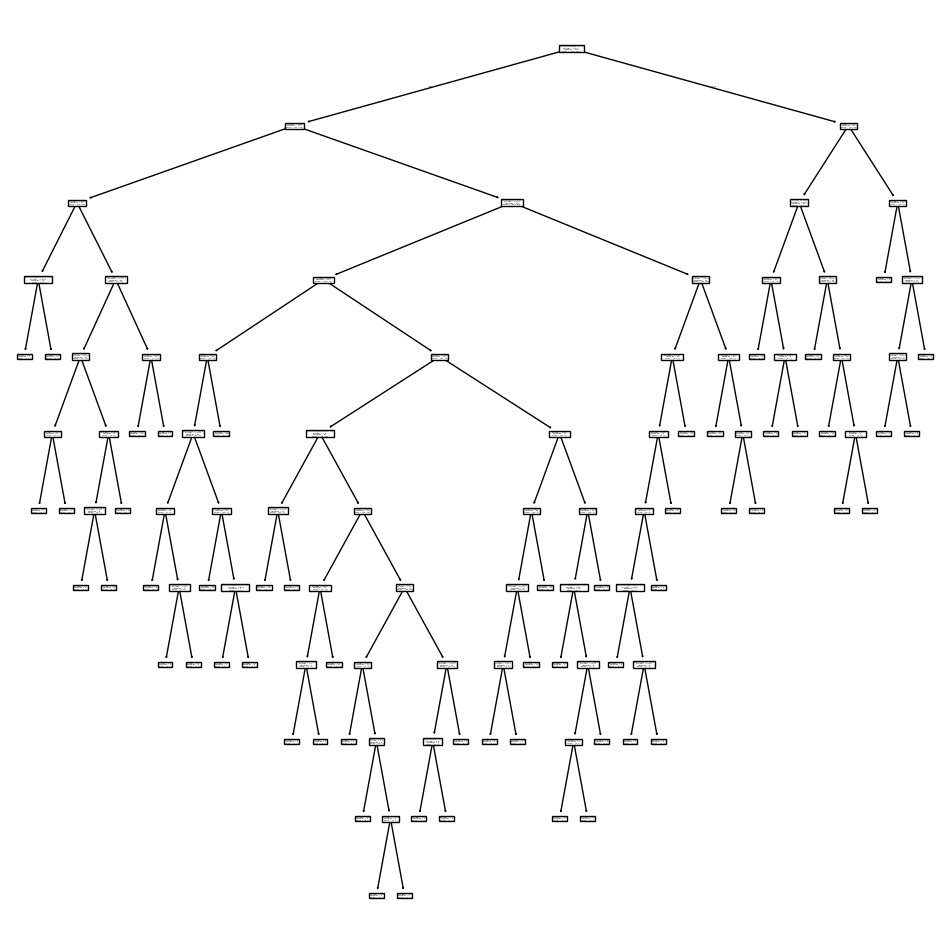

In [10]:
# Plot the classification tree
ax = subplots(figsize=(12, 12))[1]
plot_tree(clf, feature_names=feature_names, ax=ax)


In [11]:
# Display textual representation of the tree
print(export_text(clf, feature_names=feature_names, show_weights=True))


|--- ShelveLoc[Good] <= 0.50
|   |--- Price <= 92.50
|   |   |--- Income <= 57.00
|   |   |   |--- ShelveLoc[Medium] <= 0.50
|   |   |   |   |--- weights: [7.00, 0.00] class: No
|   |   |   |--- ShelveLoc[Medium] >  0.50
|   |   |   |   |--- weights: [0.00, 3.00] class: Yes
|   |   |--- Income >  57.00
|   |   |   |--- Population <= 207.50
|   |   |   |   |--- Age <= 56.50
|   |   |   |   |   |--- Price <= 88.00
|   |   |   |   |   |   |--- weights: [0.00, 7.00] class: Yes
|   |   |   |   |   |--- Price >  88.00
|   |   |   |   |   |   |--- weights: [1.00, 0.00] class: No
|   |   |   |   |--- Age >  56.50
|   |   |   |   |   |--- Income <= 102.00
|   |   |   |   |   |   |--- Population <= 30.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: Yes
|   |   |   |   |   |   |--- Population >  30.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: No
|   |   |   |   |   |--- Income >  102.00
|   |   |   |   |   |   |--- weights: [0.00, 2.00] class: Yes
|   |   |   

In [12]:
# Create validation split
validation = skm.ShuffleSplit(
    n_splits=1,
    test_size=200,
    random_state=0
)

# Estimate test accuracy
results = skm.cross_validate(clf, D, High, cv=validation)
results['test_score']


array([0.735])

In [13]:
# Split data into training and test sets
(X_train,
 X_test,
 High_train,
 High_test) = skm.train_test_split(
    X, High, test_size=0.5, random_state=0
)


In [14]:
# Fit full classification tree (no depth restriction)
clf = DTC(criterion='entropy', random_state=0)
clf.fit(X_train, High_train)

# Test accuracy
accuracy_score(High_test, clf.predict(X_test))


0.735

In [15]:
# Extract cost-complexity pruning path
ccp_path = clf.cost_complexity_pruning_path(X_train, High_train)

# Define K-fold cross-validation
kfold = skm.KFold(10, random_state=1, shuffle=True)


In [16]:
# Grid search over ccp_alpha values
grid = skm.GridSearchCV(
    clf,
    {'ccp_alpha': ccp_path.ccp_alphas},
    cv=kfold,
    scoring='accuracy',
    refit=True
)

grid.fit(X_train, High_train)

# Best cross-validation score
grid.best_score_


np.float64(0.685)

[Text(0.4345703125, 0.95, 'Price <= 94.5\nentropy = 0.977\nsamples = 200\nvalue = [118, 82]'),
 Text(0.1875, 0.85, 'CompPrice <= 118.5\nentropy = 0.769\nsamples = 40\nvalue = [9, 31]'),
 Text(0.31103515625, 0.8999999999999999, 'True  '),
 Text(0.15625, 0.75, 'Price <= 86.5\nentropy = 0.894\nsamples = 29\nvalue = [9, 20]'),
 Text(0.09375, 0.65, 'Income <= 60.0\nentropy = 0.523\nsamples = 17\nvalue = [2, 15]'),
 Text(0.0625, 0.55, 'Advertising <= 5.0\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.03125, 0.45, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.09375, 0.45, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.125, 0.55, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.21875, 0.65, 'Population <= 212.5\nentropy = 0.98\nsamples = 12\nvalue = [7, 5]'),
 Text(0.1875, 0.55, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.25, 0.55, 'Income <= 36.5\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(0.21875, 0.45, 'entropy = 0.0\nsamples = 3\nval

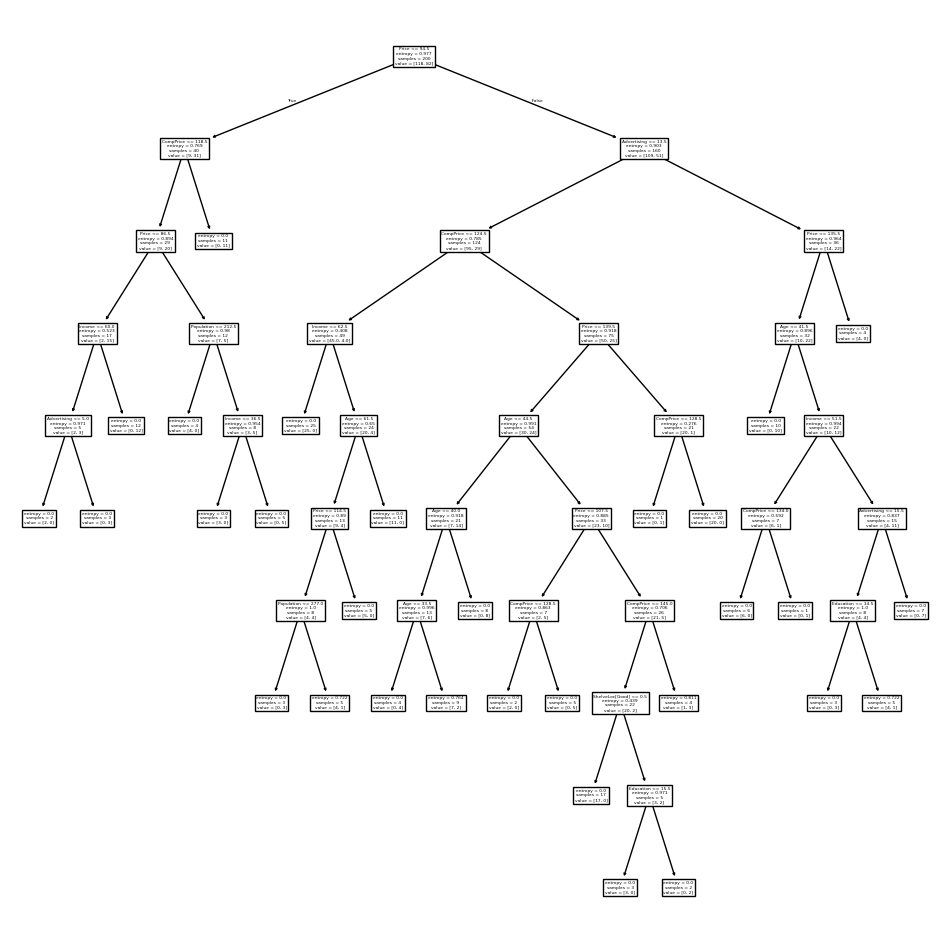

In [17]:
# Plot the pruned tree
ax = subplots(figsize=(12, 12))[1]
best_ = grid.best_estimator_
plot_tree(best_, feature_names=feature_names, ax=ax)


In [18]:
# Number of terminal nodes
best_.tree_.n_leaves

# Test accuracy of pruned tree
accuracy_score(High_test, best_.predict(X_test))

# Confusion matrix
confusion_table(best_.predict(X_test), High_test)


Truth,No,Yes
Predicted,,
No,94,32
Yes,24,50


In [19]:
# Load Boston housing data
Boston = load_data("Boston")

# Create design matrix without intercept
model = MS(Boston.columns.drop('medv'), intercept=False)
D = model.fit_transform(Boston)

# Feature names and predictors
feature_names = list(D.columns)
X = np.asarray(D)


In [20]:
# Split Boston data into training and testing sets
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(
    X, Boston['medv'], test_size=0.3, random_state=0
)


[Text(0.5, 0.875, 'rm <= 6.797\nsquared_error = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(0.25, 0.625, 'lstat <= 14.405\nsquared_error = 35.011\nsamples = 284\nvalue = 19.614'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'dis <= 1.474\nsquared_error = 20.776\nsamples = 167\nvalue = 22.981'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(0.1875, 0.125, 'squared_error = 12.072\nsamples = 165\nvalue = 22.653'),
 Text(0.375, 0.375, 'crim <= 5.782\nsquared_error = 16.049\nsamples = 117\nvalue = 14.808'),
 Text(0.3125, 0.125, 'squared_error = 10.345\nsamples = 67\nvalue = 16.872'),
 Text(0.4375, 0.125, 'squared_error = 10.334\nsamples = 50\nvalue = 12.042'),
 Text(0.75, 0.625, 'rm <= 7.435\nsquared_error = 85.388\nsamples = 70\nvalue = 35.451'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'crim <= 7.393\nsquared_error = 44.147\nsamples = 47\nvalue = 30.921'),
 Text(0.5625, 0.125, 'squared_error = 19.597\nsamples = 43\nvalue = 32.465'),
 Text

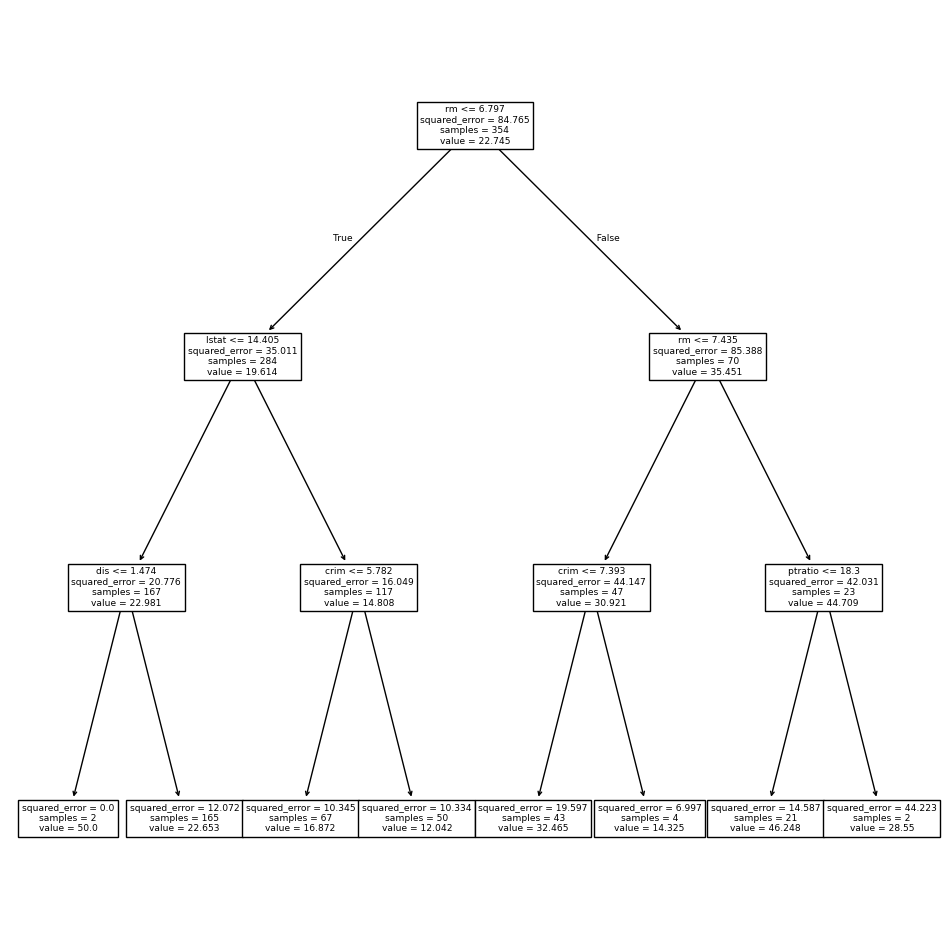

In [21]:
# Fit regression tree with limited depth
reg = DTR(max_depth=3)
reg.fit(X_train, y_train)

# Plot regression tree
ax = subplots(figsize=(12, 12))[1]
plot_tree(reg, feature_names=feature_names, ax=ax)


In [22]:
# Fit Random Forest regressor
rf = RF(random_state=0)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [23]:
# Fit Gradient Boosting regressor
boost = GBR(random_state=0)
boost.fit(X_train, y_train)


GradientBoostingRegressor(random_state=0)

In [25]:
# Fit BART model
bart = BART(random_state=0)
bart.fit(X_train, y_train)


BART(random_state=0)

In [26]:
# Compare R-squared values
print("Tree:", reg.score(X_test, y_test))
print("Random Forest:", rf.score(X_test, y_test))
print("Boosting:", boost.score(X_test, y_test))
print("BART:", bart.score(X_test, y_test))


Tree: 0.6628873063238392
Random Forest: 0.8242405334473736
Boosting: 0.8444237159861083
BART: 0.7717062481237063
